In [1]:
import pandas as pd
import numpy as np

df1 = pd.read_csv("실습 파일/02_Data.csv")
df1.head(2)

,Index,Member_ID,Sales_Type,Contract_Type,Channel,Datetime,Term,Payment_Type,Product_Type,Amount_Month,Customer_Type,Age,Address1,Address2,State,Overdue_count,Overdue_Type,Gender,Credit_Rank,Bank
0,1,66758234,렌탈,일반계약,영업방판,2022-05-05,60,CMS,DES-1,96900,개인,42.0,경기도,경기도,계약확정,0,없음,여자,9.0,새마을금고
1,2,66755948,렌탈,교체계약,영업방판,2023-02-19,60,카드이체,DES-1,102900,개인,39.0,경기도,경기도,계약확정,0,없음,남자,2.0,현대카드


In [2]:
# 이상치
# 평균 : 모든 값을 더하고, 개수만큼 나누는 것
# 중앙값 : 데이터를 정렬했을 때, 가운데 있는 값 (짝수 : 가운데 2개를 평균)
# 표준편차 : 데이터들이 대푯값으로부터 얼마나 떨어져 있는가

print(df1['Amount_Month'].mean()) # 평균
print(df1['Amount_Month'].max()) # 최대값
print(df1['Amount_Month'].min()) # 최소값
print(df1['Amount_Month'].median()) # 중앙값

93994.97428900021
215700
54603
96900.0


In [3]:
df1.describe() #숫자로 된 열들의 요약 통계량

,Index,Member_ID,Term,Amount_Month,Age,Overdue_count,Credit_Rank
count,51301.000000,5.130100e+04,51301.000000,51301.000000,44329.000000,51301.000000,42520.000000
mean,25651.703612,6.266432e+07,55.639149,93994.974289,50.024093,0.161381,3.428810
std,14809.828628,1.216146e+07,12.009915,15304.263988,10.983877,1.122193,2.213453
min,1.000000,2.568798e+07,12.000000,54603.000000,25.000000,0.000000,0.000000
25%,12826.000000,6.643148e+07,60.000000,81900.000000,42.000000,0.000000,1.000000
50%,25652.000000,6.676578e+07,60.000000,96900.000000,49.000000,0.000000,3.000000
75%,38477.000000,6.678160e+07,60.000000,98400.000000,57.000000,0.000000,5.000000
max,51302.000000,6.696986e+07,60.000000,215700.000000,102.000000,15.000000,10.000000


In [4]:
df1.Contract_Type

0          일반계약
1          교체계약
2          일반계약
3        멤버십3유형
4        멤버십3유형
          ...  
51296    프로모션계약
51297      일반계약
51298    프로모션계약
51299      일반계약
51300      일반계약
Name: Contract_Type, Length: 51301, dtype: object

In [5]:
df1['Contract_Type'].unique()

array(['일반계약', '교체계약', '멤버십3유형', '프로모션계약', '패키지계약', '멤버십1유형', '멤버십4유형',
       '단체계약', '멤버십2유형'], dtype=object)

In [6]:
df1.Contract_Type.value_counts()

Contract_Type
프로모션계약    15811
일반계약      15321
패키지계약     10186
교체계약       4975
멤버십3유형     2627
멤버십2유형     2086
단체계약        190
멤버십4유형       92
멤버십1유형       13
Name: count, dtype: int64

<Axes: xlabel='Contract_Type'>

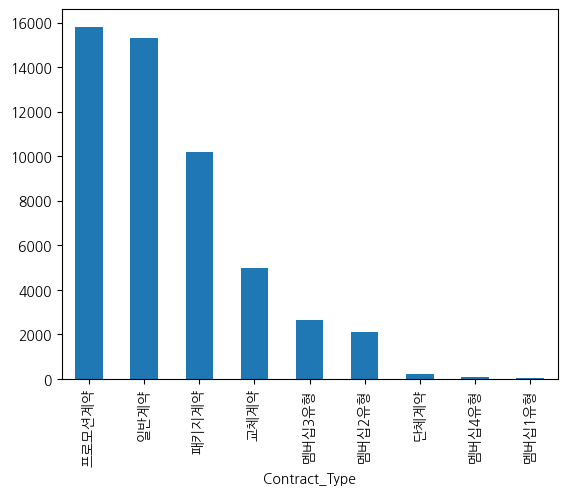

In [7]:
# 아나콘다 프롬포트에 다운로드 pip install koreanize-matplotlib
import koreanize_matplotlib
df1['Contract_Type'].value_counts().plot.bar()

### 시각화 방법 3가지
* matplotlib : 근본 (커스터마이징이 아주 잘 된다) + (대신 옵션 값이 많고, 다루기 어려움)
* seaborn : 데이터 분석 연습용 라이브러리 + 시각화(자동으로 예쁜 그래프 - 논문 사용 가능) + 확장성은 낮음
* pandas : 간단하게 그려볼때, 이상치가 있는지 간단히 빠르게 그릴 때 사용

In [8]:
df1.describe(include='object')
#top : 많이 나온 값
#freq : 그 값의 빈도값?

,Sales_Type,Contract_Type,Channel,Datetime,Payment_Type,Product_Type,Customer_Type,Address1,Address2,State,Overdue_Type,Gender,Bank
count,51301,51301,51301,51301,51301,51301,51299,51299,51299,51301,51301,51301,48542
unique,2,9,16,577,5,6,2,8,14,4,2,2,47
top,렌탈,프로모션계약,영업방판,2022-01-30,CMS,DES-1,개인,경기도,경기도,계약확정,없음,여자,롯데카드
freq,46483,15811,23767,1167,32825,39133,46263,18353,14883,50620,49110,35602,9516


In [9]:
df1.describe(include="all")

,Index,Member_ID,Sales_Type,Contract_Type,Channel,Datetime,Term,Payment_Type,Product_Type,Amount_Month,Customer_Type,Age,Address1,Address2,State,Overdue_count,Overdue_Type,Gender,Credit_Rank,Bank
count,51301.000000,5.130100e+04,51301,51301,51301,51301,51301.000000,51301,51301,51301.000000,51299,44329.000000,51299,51299,51301,51301.000000,51301,51301,42520.000000,48542
unique,NaN,NaN,2,9,16,577,NaN,5,6,NaN,2,NaN,8,14,4,NaN,2,2,NaN,47
top,NaN,NaN,렌탈,프로모션계약,영업방판,2022-01-30,NaN,CMS,DES-1,NaN,개인,NaN,경기도,경기도,계약확정,NaN,없음,여자,NaN,롯데카드
freq,NaN,NaN,46483,15811,23767,1167,NaN,32825,39133,NaN,46263,NaN,18353,14883,50620,NaN,49110,35602,NaN,9516
mean,25651.703612,6.266432e+07,NaN,NaN,NaN,NaN,55.639149,NaN,NaN,93994.974289,NaN,50.024093,NaN,NaN,NaN,0.161381,NaN,NaN,3.428810,NaN
std,14809.828628,1.216146e+07,NaN,NaN,NaN,NaN,12.009915,NaN,NaN,15304.263988,NaN,10.983877,NaN,NaN,NaN,1.122193,NaN,NaN,2.213453,NaN
min,1.000000,2.568798e+07,NaN,NaN,NaN,NaN,12.000000,NaN,NaN,54603.000000,NaN,25.000000,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN
25%,12826.000000,6.643148e+07,NaN,NaN,NaN,NaN,60.000000,NaN,NaN,81900.000000,NaN,42.000000,NaN,NaN,NaN,0.000000,NaN,NaN,1.000000,NaN
50%,25652.000000,6.676578e+07,NaN,NaN,NaN,NaN,60.000000,NaN,NaN,96900.000000,NaN,49.000000,NaN,NaN,NaN,0.000000,NaN,NaN,3.000000,NaN
75%,38477.000000,6.678160e+07,NaN,NaN,NaN,NaN,60.000000,NaN,NaN,98400.000000,NaN,57.000000,NaN,NaN,NaN,0.000000,NaN,NaN,5.000000,NaN


### Pivot Table
내가 원하는 행과 열을 설정해서 통계량 집계

In [10]:
import seaborn as sns

#식당 데이터
tips = sns.load_dataset("tips")
tips 

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [11]:
# pivot_table의 기본값은 mean. aggfunc 설정안해도 되긴 함
tips.pivot_table(index = "sex", values="tip", aggfunc = "mean")

,tip
sex,
Male,3.089618
Female,2.833448


In [12]:
tips.pivot_table(index="sex", columns="time", values="tip", aggfunc="mean")

time,Lunch,Dinner
sex,,
Male,2.882121,3.144839
Female,2.582857,3.002115


In [13]:
tips.pivot_table(index="sex", columns="time", values="tip", aggfunc="sum")

time,Lunch,Dinner
sex,,
Male,95.11,389.96
Female,90.40,156.11


In [14]:
# 성별별로, 시간별로, 요일별로 팁의 평균
tips.pivot_table(index=['sex','time'],columns='day', values='tip')

day                Thur       Fri       Sat       Sun
sex    time                                          
Male   Lunch   2.980333  1.900000       NaN       NaN
       Dinner       NaN  3.032857  3.083898  3.220345
Female Lunch   2.561935  2.745000       NaN       NaN
       Dinner  3.000000  2.810000  2.801786  3.367222

In [15]:
# 성별별로, 음식값 평균, 팁은 중앙값
tips.pivot_table(index='sex', values=['total_bill','tip'], 
                 aggfunc={'total_bill' : 'mean', 'tip':'median'})

,tip,total_bill
sex,,
Male,3.00,20.744076
Female,2.75,18.056897


In [16]:
# df1 데이터를 활용
# 판매 유형별 월 렌탈 비용(Amount_Month)의 평균
df1.pivot_table(index='Sales_Type', values='Amount_Month')

,Amount_Month
Sales_Type,
렌탈,97199.625024
멤버십,63077.211706


In [17]:
# 제품군별 월 렌탈 비용의 평균
a = df1.pivot_table(index='Product_Type', values='Amount_Month')
a

,Amount_Month
Product_Type,
DES-1,94424.545166
DES-2,87556.390618
DES-3A,94706.900529
DES-R4,129444.954128
ERA,119744.720497
MMC,189450.000000


<Axes: xlabel='Product_Type'>

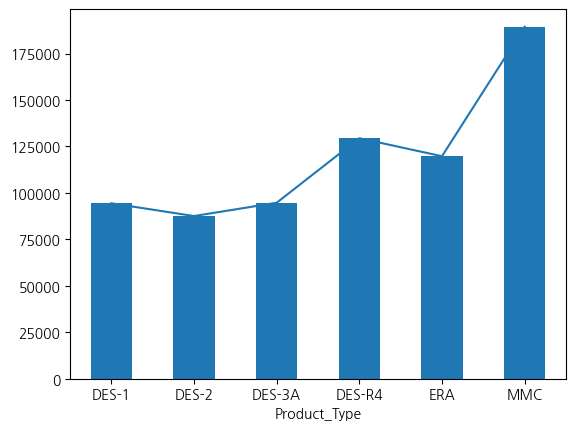

In [18]:
a['Amount_Month'].plot.bar()
a['Amount_Month'].plot()

In [19]:
# 제품군과 판매유형별 월렌탈 비용과 계약기간의 평균
df1.pivot_table(index='Product_Type', columns='Sales_Type', values='Amount_Month')

Sales_Type,렌탈,멤버십
Product_Type,,
DES-1,98694.923613,63161.706570
DES-2,87901.899247,57725.242718
DES-3A,94752.196532,75900.000000
DES-R4,130616.250000,75900.000000
ERA,119744.720497,NaN
MMC,189450.000000,NaN


In [20]:
# 누락값이 싫을 때 & 강조하고 싶을 때
df1.pivot_table(index='Product_Type', columns='Sales_Type', values='Amount_Month', fill_value=0).style.highlight_max()

Sales_Type,렌탈,멤버십
Product_Type,,
DES-1,98694.923613,63161.706570
DES-2,87901.899247,57725.242718
DES-3A,94752.196532,75900.000000
DES-R4,130616.250000,75900.000000
ERA,119744.720497,0.000000
MMC,189450.000000,0.000000


In [21]:
# style 변경
df1.pivot_table(index='Product_Type', columns='Sales_Type', values='Amount_Month', fill_value=0).style.background_gradient()

Sales_Type,렌탈,멤버십
Product_Type,,
DES-1,98694.923613,63161.706570
DES-2,87901.899247,57725.242718
DES-3A,94752.196532,75900.000000
DES-R4,130616.250000,75900.000000
ERA,119744.720497,0.000000
MMC,189450.000000,0.000000


In [22]:
# 제품군별 월렌탈 비용의 평균과 합
df1.pivot_table(index="Product_Type", values='Amount_Month',                 
                aggfunc=['mean','sum'])

,mean,sum
,Amount_Month,Amount_Month
Product_Type,,
DES-1,94424.545166,3695115726
DES-2,87556.390618,787657290
DES-3A,94706.900529,197085060
DES-R4,129444.954128,42328500
ERA,119744.720497,77115600
MMC,189450.000000,22734000


<Axes: >

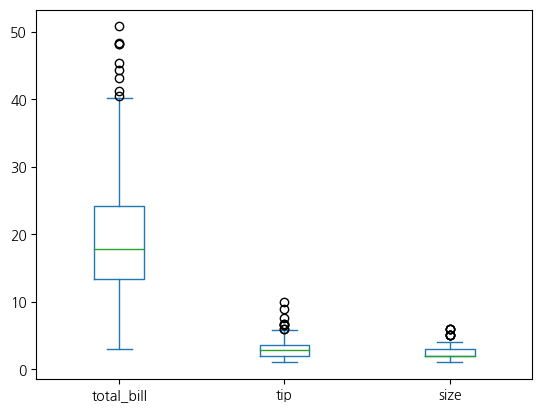

In [23]:
# 이상치 발견하고 싶을 때 아주 아주 유용한 아이
# 동그라미 아이들이 다 이상치
tips.plot.box()

In [24]:
df1.pivot_table(index="Product_Type", columns="Sales_Type", 
        values="Amount_Month", aggfunc="sum", fill_value=0).style.format("{:,}원")

Sales_Type,렌탈,멤버십
Product_Type,,
DES-1,"3,398,066,220원","297,049,506원"
DES-2,"781,711,590원","5,945,700원"
DES-3A,"196,705,560원","379,500원"
DES-R4,"41,797,200원","531,300원"
ERA,"77,115,600원",0원
MMC,"22,734,000원",0원


### 결측치(누락값) 처리
누락값 처리는 데이터를 이해하고 파악한 후 적절한 값으로 처리해야 함...
* 평균, 중앙값, 0 처리  // 무작위로 샘플 추출해도 조심해야 함! 


In [25]:
df = pd.read_csv("실습 파일/country_timeseries.csv")
del df['Date']
df.head(3)

,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN


In [26]:
df.fillna(df.mean()).head(3)

,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,289,2776.0,2335.337349,10030.0,16.736842,1.08,3.277778,1.0,3.5,1786.0,1101.209877,2977.0,6.131579,0.0,0.833333,0.1875,3.166667
1,288,2775.0,2335.337349,9780.0,16.736842,1.08,3.277778,1.0,3.5,1781.0,1101.209877,2943.0,6.131579,0.0,0.833333,0.1875,3.166667
2,287,2769.0,8166.000000,9722.0,16.736842,1.08,3.277778,1.0,3.5,1767.0,3496.000000,2915.0,6.131579,0.0,0.833333,0.1875,3.166667


In [27]:
#앞에 있는 값으로 채울 때는 fillna(method="ffill") front fill
#뒤에 있는 값으로 채울 때는 fillna(method="bfill") back fill

df = pd.read_csv("실습 파일/country_timeseries.csv")
df.fillna(method='ffill').head(3)

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,1/5/2015,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,1/4/2015,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,1/3/2015,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN


In [28]:
dates = ["2024/01/01","2024/01/02",'2024/01/08',"2024/01/10"]
dates = pd.to_datetime(dates, format="%Y/%m/%d")
dates

DatetimeIndex(['2024-01-01', '2024-01-02', '2024-01-08', '2024-01-10'], dtype='datetime64[ns]', freq=None)

In [29]:
box = [1,None,None,10]
s = pd.Series(box, index= dates) # 알아서 잘 채워줬으면 좋겠다. # 
s

2024-01-01     1.0
2024-01-02     NaN
2024-01-08     NaN
2024-01-10    10.0
dtype: float64

In [30]:
s.interpolate()

2024-01-01     1.0
2024-01-02     4.0
2024-01-08     7.0
2024-01-10    10.0
dtype: float64

In [31]:
s.interpolate(method = 'time') #시간의 흐름을 파악하고, 간격이 다룸 

2024-01-01     1.0
2024-01-02     2.0
2024-01-08     8.0
2024-01-10    10.0
dtype: float64

In [32]:
df.isnull().sum()

Date                     0
Day                      0
Cases_Guinea            29
Cases_Liberia           39
Cases_SierraLeone       35
Cases_Nigeria           84
Cases_Senegal           97
Cases_UnitedStates     104
Cases_Spain            106
Cases_Mali             110
Deaths_Guinea           30
Deaths_Liberia          41
Deaths_SierraLeone      35
Deaths_Nigeria          84
Deaths_Senegal         100
Deaths_UnitedStates    104
Deaths_Spain           106
Deaths_Mali            110
dtype: int64

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 122 non-null    object 
 1   Day                  122 non-null    int64  
 2   Cases_Guinea         93 non-null     float64
 3   Cases_Liberia        83 non-null     float64
 4   Cases_SierraLeone    87 non-null     float64
 5   Cases_Nigeria        38 non-null     float64
 6   Cases_Senegal        25 non-null     float64
 7   Cases_UnitedStates   18 non-null     float64
 8   Cases_Spain          16 non-null     float64
 9   Cases_Mali           12 non-null     float64
 10  Deaths_Guinea        92 non-null     float64
 11  Deaths_Liberia       81 non-null     float64
 12  Deaths_SierraLeone   87 non-null     float64
 13  Deaths_Nigeria       38 non-null     float64
 14  Deaths_Senegal       22 non-null     float64
 15  Deaths_UnitedStates  18 non-null     flo

In [34]:
df['Date'] = pd.to_datetime(df['Date'], format = "%m/%d/%Y")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 122 non-null    datetime64[ns]
 1   Day                  122 non-null    int64         
 2   Cases_Guinea         93 non-null     float64       
 3   Cases_Liberia        83 non-null     float64       
 4   Cases_SierraLeone    87 non-null     float64       
 5   Cases_Nigeria        38 non-null     float64       
 6   Cases_Senegal        25 non-null     float64       
 7   Cases_UnitedStates   18 non-null     float64       
 8   Cases_Spain          16 non-null     float64       
 9   Cases_Mali           12 non-null     float64       
 10  Deaths_Guinea        92 non-null     float64       
 11  Deaths_Liberia       81 non-null     float64       
 12  Deaths_SierraLeone   87 non-null     float64       
 13  Deaths_Nigeria       38 non-null   

In [35]:
# 인덱스 변경
df = df.set_index("Date")
df.head(4)

,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
Date,,,,,,,,,,,,,,,,,
2015-01-05,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
2015-01-04,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2015-01-03,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
2015-01-02,286,NaN,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
# 시계열 순으로 변경
df = df.sort_index()
df

,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
Date,,,,,,,,,,,,,,,,,
2014-03-22,0,49.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-03-24,2,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-03-25,3,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-03-26,4,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-03-27,5,103.0,8.0,6.0,NaN,NaN,NaN,NaN,NaN,66.0,6.0,5.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-12-31,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN
2015-01-02,286,NaN,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-03,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN


In [37]:
df = df.interpolate(method='time')
df = df.fillna(method="ffill")
df = df.fillna(method = 'bfill')
df.head(4)

,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
Date,,,,,,,,,,,,,,,,,
2014-03-22,0,49.0,8.0,6.0,0.0,1.0,1.0,1.0,1.0,29.0,6.0,5.0,0.0,0.0,0.0,1.0,1.0
2014-03-24,2,86.0,8.0,6.0,0.0,1.0,1.0,1.0,1.0,59.0,6.0,5.0,0.0,0.0,0.0,1.0,1.0
2014-03-25,3,86.0,8.0,6.0,0.0,1.0,1.0,1.0,1.0,60.0,6.0,5.0,0.0,0.0,0.0,1.0,1.0
2014-03-26,4,86.0,8.0,6.0,0.0,1.0,1.0,1.0,1.0,62.0,6.0,5.0,0.0,0.0,0.0,1.0,1.0


In [38]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51301 entries, 0 to 51300
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Index          51301 non-null  int64  
 1   Member_ID      51301 non-null  int64  
 2   Sales_Type     51301 non-null  object 
 3   Contract_Type  51301 non-null  object 
 4   Channel        51301 non-null  object 
 5   Datetime       51301 non-null  object 
 6   Term           51301 non-null  int64  
 7   Payment_Type   51301 non-null  object 
 8   Product_Type   51301 non-null  object 
 9   Amount_Month   51301 non-null  int64  
 10  Customer_Type  51299 non-null  object 
 11  Age            44329 non-null  float64
 12  Address1       51299 non-null  object 
 13  Address2       51299 non-null  object 
 14  State          51301 non-null  object 
 15  Overdue_count  51301 non-null  int64  
 16  Overdue_Type   51301 non-null  object 
 17  Gender         51301 non-null  object 
 18  Credit

In [39]:
# 누락값이 있는 행 삭제
df1.dropna().isnull().sum()

Index            0
Member_ID        0
Sales_Type       0
Contract_Type    0
Channel          0
Datetime         0
Term             0
Payment_Type     0
Product_Type     0
Amount_Month     0
Customer_Type    0
Age              0
Address1         0
Address2         0
State            0
Overdue_count    0
Overdue_Type     0
Gender           0
Credit_Rank      0
Bank             0
dtype: int64

In [40]:
# 특정 열을 제외하고 누락값이 있는 행 삭제
df1.drop(columns = ['Credit_Rank', 'Age']).dropna()

,Index,Member_ID,Sales_Type,Contract_Type,Channel,Datetime,Term,Payment_Type,Product_Type,Amount_Month,Customer_Type,Address1,Address2,State,Overdue_count,Overdue_Type,Gender,Bank
0,1,66758234,렌탈,일반계약,영업방판,2022-05-05,60,CMS,DES-1,96900,개인,경기도,경기도,계약확정,0,없음,여자,새마을금고
1,2,66755948,렌탈,교체계약,영업방판,2023-02-19,60,카드이체,DES-1,102900,개인,경기도,경기도,계약확정,0,없음,남자,현대카드
2,3,66756657,렌탈,일반계약,홈쇼핑/방송,2022-02-27,60,CMS,DES-1,96900,개인,경기도,경기도,계약확정,0,없음,여자,우리은행
3,4,66423450,멤버십,멤버십3유형,재계약,2022-05-12,12,CMS,DES-1,66900,개인,경기도,경기도,계약확정,0,없음,남자,농협회원조합
4,5,66423204,멤버십,멤버십3유형,재계약,2022-05-09,12,CMS,DES-1,66900,개인,경기도,경기도,기간만료,12,있음,남자,농협회원조합
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51296,51298,66579515,렌탈,프로모션계약,대형마트A,2022-02-28,60,CMS,DES-3A,96900,개인,경기도,경기도,계약확정,0,없음,남자,기업은행
51297,51299,66799558,렌탈,일반계약,대형마트A,2022-03-31,60,CMS,DES-1,96900,개인,경기도,경기도,계약확정,0,없음,여자,새마을금고
51298,51300,66799197,렌탈,프로모션계약,영업방판,2022-03-31,39,카드이체,ERA,120900,개인,서울특별시,서울특별시,계약확정,0,없음,여자,롯데카드
51299,51301,66792778,렌탈,일반계약,홈쇼핑/방송,2023-02-05,60,카드이체,DES-1,96900,개인,서울특별시,서울특별시,계약확정,0,없음,여자,롯데카드


In [41]:
# subset 기준 누락 행만 제거
df1.dropna(subset="Age").isnull() 
df1.dropna(subset=["Age", "Credit_Rank"]).isnull().sum()

Index            0
Member_ID        0
Sales_Type       0
Contract_Type    0
Channel          0
Datetime         0
Term             0
Payment_Type     0
Product_Type     0
Amount_Month     0
Customer_Type    0
Age              0
Address1         0
Address2         0
State            0
Overdue_count    0
Overdue_Type     0
Gender           0
Credit_Rank      0
Bank             1
dtype: int64

### Cross Tab 
원하는 행과 열을 설정해서 빈도값을 확인하는 것

* Pivot Table은 집계값

In [43]:
pd.crosstab(index = tips.sex, columns=tips.day)

day,Thur,Fri,Sat,Sun
sex,,,,
Male,30,10,59,58
Female,32,9,28,18


In [44]:
pd.crosstab(index = tips.sex, columns=tips.day, margins = True)

day,Thur,Fri,Sat,Sun,All
sex,,,,,
Male,30,10,59,58,157
Female,32,9,28,18,87
All,62,19,87,76,244


In [47]:
a = pd.crosstab(index=[tips['sex'], tips['time']], columns = tips['day'])
a.to_excel("a.xlsx")

In [48]:
a

day            Thur  Fri  Sat  Sun
sex    time                       
Male   Lunch     30    3    0    0
       Dinner     0    7   59   58
Female Lunch     31    4    0    0
       Dinner     1    5   28   18

In [50]:
# 전체 합 1
pd.crosstab(index = tips['sex'], columns=tips['day'], normalize=True)

day,Thur,Fri,Sat,Sun
sex,,,,
Male,0.122951,0.040984,0.241803,0.237705
Female,0.131148,0.036885,0.114754,0.073770


In [51]:
# 행별로 합 1
pd.crosstab(index = tips['sex'], columns=tips['day'], normalize='index')

day,Thur,Fri,Sat,Sun
sex,,,,
Male,0.191083,0.063694,0.375796,0.369427
Female,0.367816,0.103448,0.321839,0.206897


In [53]:
# 열별로 합 1
pd.crosstab(index = tips['sex'], columns=tips['day'], normalize='columns')

day,Thur,Fri,Sat,Sun
sex,,,,
Male,0.483871,0.526316,0.678161,0.763158
Female,0.516129,0.473684,0.321839,0.236842


In [54]:
df = pd.read_csv('실습 파일/gapminder.tsv', sep='\t')
df

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623
